<a href="https://colab.research.google.com/github/gmanojkumar402-max/Manoj-colab-notebooks/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 400

# Create columns
user_id = np.arange(1, n+1)

# Randomly assign genders
gender = np.random.choice(['Male', 'Female'], size=n)

# Random ages (between 18 and 60)
age = np.random.randint(18, 60, size=n)

# Estimated salaries (in USD, between 20k and 150k)
estimated_salary = np.random.randint(20000, 150000, size=n)

# Define a simple rule to simulate purchase behavior
# e.g., older users with higher salary are more likely to purchase
purchased = ((age > 30) & (estimated_salary > 60000)).astype(int)

# Combine into a DataFrame
df = pd.DataFrame({
    'User ID': user_id,
    'Gender': gender,
    'Age': age,
    'EstimatedSalary': estimated_salary,
    'Purchased': purchased
})

# Display first few rows
print(df.head())



   User ID  Gender  Age  EstimatedSalary  Purchased
0        1    Male   41           131854          1
1        2  Female   28           132816          0
2        3    Male   25           148778          0
3        4    Male   53            82292          1
4        5    Male   55            43833          0


In [2]:
X = df.iloc[:,2:4].values # storing the columns that are converted into array in X

In [3]:
X.shape # gives shape of X

(400, 2)

In [4]:
y = df.iloc[:,-1].values # last column converted into numpy array and stored in y

In [5]:
y.shape

(400,)

lets devide data into train and test for cross validation

In [6]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
X_train.shape

(320, 2)

In [8]:
X_train.shape[0]

320

In [9]:
X_test.shape

(80, 2)

Now lets perform standard scaling
when we compare the squared diffrence of age and salary the salary column will influence the output

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

To calculate the value of k we have 2 methods lets 1st use the 1st method

In [11]:
np.sqrt(X_train.shape[0])

np.float64(17.88854381999832)

In [12]:
k = 17

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
y_pred.shape

(80,)

In [16]:
y_test.shape

(80,)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.975

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[41,  1],
       [ 1, 37]])

Trail and error method

In [19]:
accuracy = []
for i in range(1,26):
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  accuracy.append(accuracy_score(y_test,y_pred))


In [20]:
len(accuracy)

25

lets plot a graph where we are getting maximum accuracy

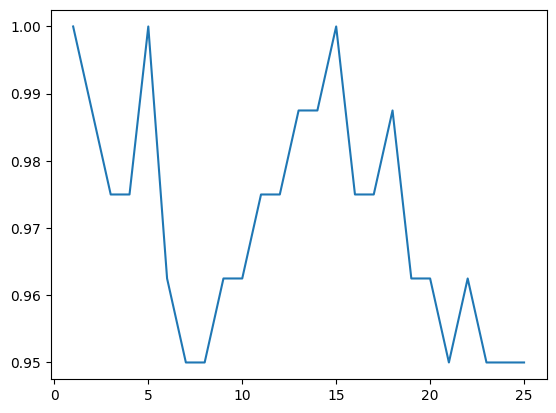

In [21]:
plt.plot(range(1,26),accuracy)

In [22]:
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred)

1.0

Lets create a function which provides the output if we provide a new incoming point

In [25]:
def predict_output():
  age = int(input("enter the age"))
  salary = int(input("enter the salary"))
  X_new = np.array([[age],[salary]]).reshape(1,2) # we have converted these 2 values into a numpy array and it should be a 2D matrix
  X_new = sc.transform(X_new) # scaling down the salary in the range of age
  if classifier.predict(X_new)[0] == 0:
    return "not purchased"
  else:
    return "purchased"

In [26]:
predict_output()

enter the age26
enter the salary45000


'not purchased'

A decision boundary is an invisible line (or surface) that separates different classes in a classification problem.

Train KNN.

Make a dense grid covering your data.

Ask KNN to predict every grid point.

Color the grid by predictions (that picture shows class regions).

Overlay original points — where the colors change is your decision boundary.

Creating a mesh grid : basically coordinate system generated by 2 input arrays


In [27]:
import numpy as np
import matplotlib.pyplot as plt

No lets say we have 2 arrays x = [1 2 3 4] and y = [7 6 5]

17 27 37 47
16 26 36 46
15 25 35 45

XX = 1 2 3 4     yy = 7 7 7 7
     1 2 3 4          6 6 6 6
     1 2 3 4          5 5 5 5
     
XX and yy arrays will always have same shape     
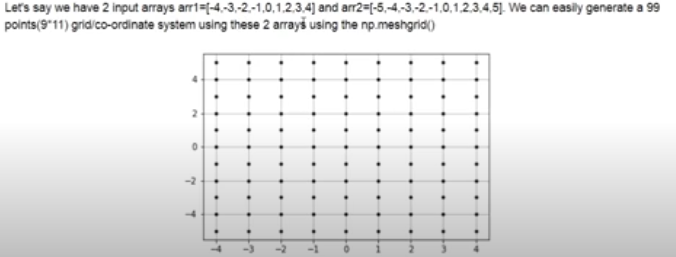

Lets create a sample grid

In [29]:
x = np.array([1,2,3])
y = np.array([4,5,6,7])
np.meshgrid(x,y)

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6],
        [7, 7, 7]]))

now lets store them in variables XX and yy and get the shape

In [33]:
XX,yy = np.meshgrid(x,y)
print(XX.shape)
print(yy.shape)

(4, 3)
(4, 3)


Now from the above we can say that we have created mesh grids
Now what is the purpose of mesh grid
It is useful to evaluate functions on a grid we can apply any function to the points of a meshgrid to plot a function

Plotting a function using a meshgrid

In [36]:
x = np.linspace(-40,40,100) # Give me 100 numbers that go smoothly from -40 to 40
y = np.linspace(-50,50,90)
XX,yy = np.meshgrid(x,y)
print(XX.shape)
print(yy.shape)

(90, 100)
(90, 100)


using this mesh grid xx and yy we will craete a variable z  which will be an array and this array is calculated using XX and yy infact we are going to create a function for elipse

equation for elipse (XX**2) + (yy**2)
\

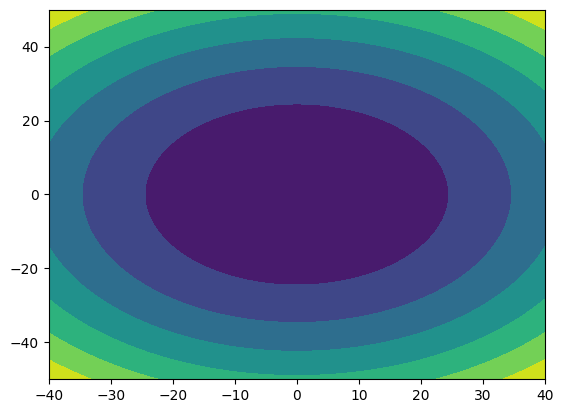

In [41]:
a = 40
b = 50
z = (XX)**2 + (yy)**2
plt.contourf(XX,yy,z)

lets say now e use random function instead of elipse function
so that there exist no patterns on my coordinate space

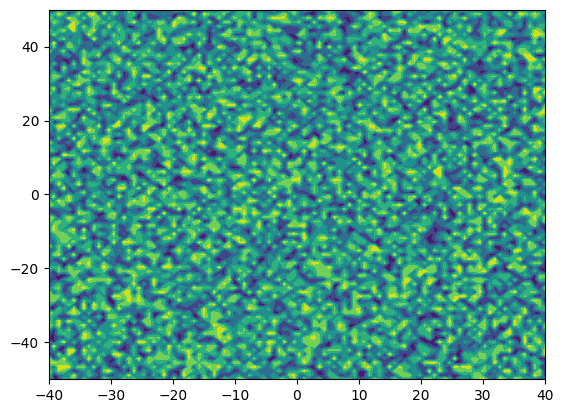

In [43]:
z= np.random.random((90,100))
plt.contourf(XX,yy,z)

we can even increase resolution by increasing the number of points on the coordinate system

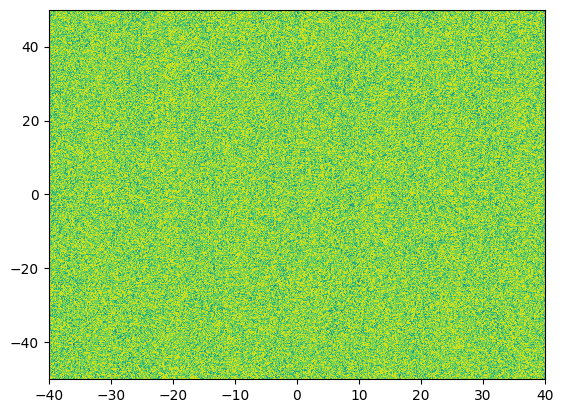

In [44]:
x = np.linspace(-40,40,1000) # Give me 100 numbers that go smoothly from -40 to 40
y = np.linspace(-50,50,900)
XX,yy = np.meshgrid(x,y)
z= np.random.random((900,1000))
plt.contourf(XX,yy,z)

Now lets create mesh grid for our project now we will gets our input arrays from x_train
As we have to plot a coordinate system with x and y axis and the x axis is going to be the age column and y axis will be going to be the salary column

our X_train is a 2d array with 2 columns where 1st column represents age and 2nd column represents salary column


In [51]:
X_train # 2D array
X_train[:5] # getting 1st 5 rows of 2D array

array([[ 0.94210305,  0.63494503],
       [ 0.0940778 , -0.76614065],
       [ 1.62052325, -1.38480575],
       [-1.68677523, -0.51007165],
       [-1.68677523,  0.3329437 ]])

lets for 2 seperate arrys one for each column


In [56]:
a = np.arange(start = X_train[:,0].min()-1, stop = X_train[:,0].max()+1, step = 0.01) # i want to start from min i will provide all the rows but zero column of x_train and i will fetch min value
a.shape

(548,)

so in the above code in my new mesh grid i want the x axis should start from the min value of x_train that to in the age column to be on the safe side i want it to start even before the min value and for stop we will pass X_train[:,0].max()+1, ineed a step increment of 0.01

In [58]:
b = np.arange(start = X_train[:,1].min()-1, stop = X_train[:,1].max()+1, step = 0.01)
b.shape

(524,)

lets quickly create a mesh grid


In [61]:
XX,yy = np.meshgrid(a,b)
print(XX.shape)
print(yy.shape)

(524, 548)
(524, 548)


classifying every point on the mesh grid

In this point we will take every point of the mesh grid and we have to input it to knn.predict function then it will predict if the point or the person with age and salary has purchased the product or not

In [62]:
524*548   # total customer we have in total that we have to deal with

287152

Here XX contains the age of all the customers and yy contains the salaries of all the customers

Now our challenge is to take the input values ie the age and salary value of all the customers and feed that values in knn.predict function and get a result
result will be either 1 or 0 and we have to create an array like that

Lets 1st see how to calculate or predict the class of 1st customer out of all the 287152 customers

In [64]:
XX.shape

(524, 548)

In [66]:
XX[0][0] # to fetch the 1st guy out of XX
# below is the age value of 1st customer

np.float64(-2.7715777527239878)

In [67]:
yy[0][0] # to fetch the 1st guy out of yy
# below is the salary value of 1st customer

np.float64(-2.563946820718703)

In [70]:
classifier.predict(np.array([-2.7715777527239878,-2.563946820718703]).reshape(1,2))

array([0])

 inside predict we have to pass numpy array which should have a shape of x(rows) ,2 (columns) we are not concerned about the number of rows but about number of columns  as when we trained and predicted our classifier both of our x_train and x_test have the same shape of (x,2)

 so to predict the class of a new customer we have to make sure the shape is (1,2) which is 1 ustomer with 2 features age and salary

 Above is a small cutout from the problem as we dealt with 1 customer and now we have to deal with all 287152 customer

Lets write an array with our desired shape X,2

ravel transform higher dimensional arrays to 1D array

In [78]:
np.array([XX.ravel(),yy.ravel()]).shape

(2, 287152)


lets create 2 arrays see how ravel works

It will convert 2D array into a 1D array
---



In [76]:
m = np.array([[1,2,3], [4,5,6]])
n = np.array([[7,8,9],[0,0,0]])
print(m)
print(m.shape)
print(n)

[[1 2 3]
 [4 5 6]]
(2, 3)
[[7 8 9]
 [0 0 0]]


In [72]:
np.array([m.ravel(), n.ravel()])

array([[1, 2, 3, 4, 5, 6],
       [7, 8, 9, 0, 0, 0]])

In [73]:
np.array([m.ravel(), n.ravel()]).shape

(2, 6)

Here after applying ravel function we got (2,x) but if we remember we need (x,2) as our input array shape to algorithm is (x,2) so now lets transpose it

In [80]:
np.array([XX.ravel(),yy.ravel()]).T

array([[-2.77157775, -2.56394682],
       [-2.76157775, -2.56394682],
       [-2.75157775, -2.56394682],
       ...,
       [ 2.67842225,  2.66605318],
       [ 2.68842225,  2.66605318],
       [ 2.69842225,  2.66605318]])

In [81]:
np.array([XX.ravel(),yy.ravel()]).T.shape

(287152, 2)

from the above we got a new array with shape (287152, 2)

Now lets store it into a variable called input_array

In [84]:
np.array([XX.ravel(),yy.ravel()]).T.shape




(287152, 2)

In [85]:
input_array = np.array([XX.ravel(),yy.ravel()]).T
classifier.predict(input_array)

array([0, 0, 0, ..., 1, 1, 1])

In [86]:
classifier.predict(input_array).shape

(287152,)

above we have a set of 320 points as our training set and we have incoming new points as our test set and we are taking every point and we are calculating 320 distances and we are sorting them and we are finding out the 5 or 10 or 11 closest or nerest neighbors and we are deciding the class for each one of them so our is being done more than 2 lakh times

Now lets store the result in a variable called lables

In [89]:
label = classifier.predict(input_array)

Now we have our array which is a label consisting or 0 or 1 so it is a boolian aray  

So below we will convert it into an image

In [90]:
label

array([0, 0, 0, ..., 1, 1, 1])

Plotting the array as an image

contor function will take only x and y should be of same shape as z

Here shape of xx and yy is same (524, 548) but shape of label is 1D array so we will quickly reshape it into XX.shape

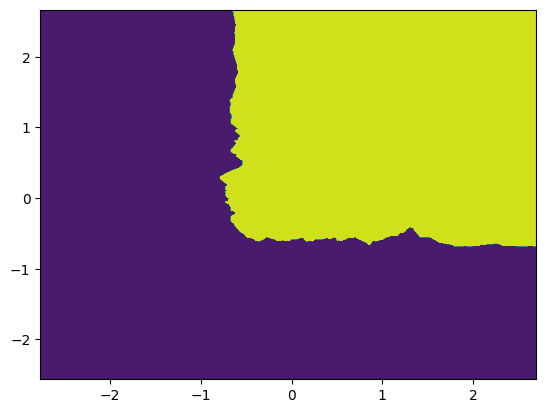

In [92]:
plt.contourf(XX,yy,label.reshape(XX.shape))

In the last step Lets plot all the training data on the plot

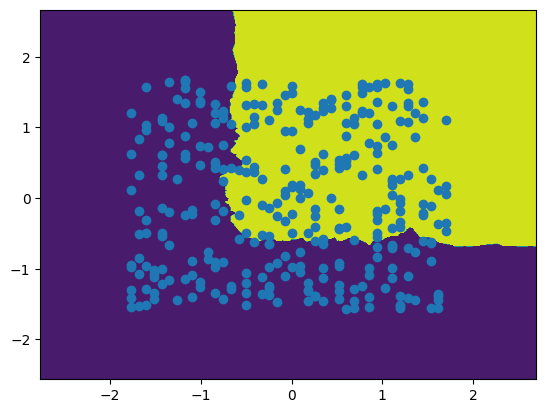

In [94]:
plt.contourf(XX,yy,label.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1])

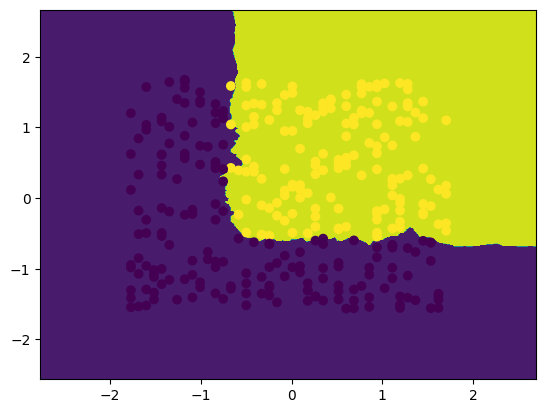

In [97]:
plt.contourf(XX,yy,label.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

We have given same color to the points as there is on the decision boundary
parameter c is just a color sequence and y_train contaions contains 0 or 1 . for every row in X_train we have got a value in y_train

Inside contour function we can pass a value called alpha
value of alpha ranges from 0 to 1
It is the transperency level of the graph

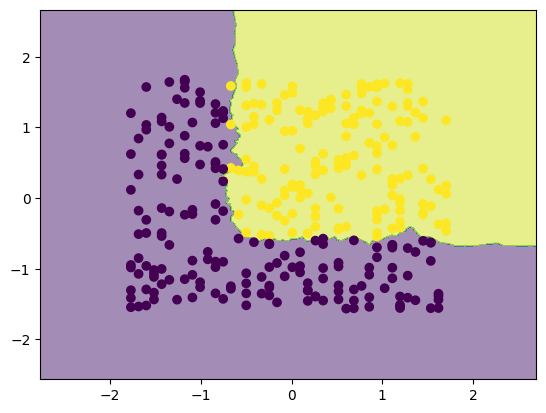

In [98]:
plt.contourf(XX,yy,label.reshape(XX.shape), alpha = 0.5)
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)